In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

In [2]:
# api key for OpenWeatherMap
api_key = '0ef0e1e8cae0c9ce2fd55f511fb39ea6'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [3]:
# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'Imperial'
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=0ef0e1e8cae0c9ce2fd55f511fb39ea6&units=Imperial&q='

In [6]:
temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind_speed = []

for city in cities:
    weather_response = requests.get(query_url + city).json()
    
    try:
        temp.append(weather_response["main"]['temp'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        print("Retrieved data for %s" % (weather_response['name']))
    except (KeyError, IndexError):
        print("No city found. Skipping....")

Retrieved data for Weyburn
Retrieved data for Albany
Retrieved data for Port Hardy
No city found. Skipping....
Retrieved data for East London
Retrieved data for Pevek
Retrieved data for Lagoa
Retrieved data for Esperance
Retrieved data for Bilma
Retrieved data for Saint Paul Harbor
Retrieved data for Yazoo City
Retrieved data for Sangar
Retrieved data for Vila
Retrieved data for Hay River
Retrieved data for Ushuaia
Retrieved data for Salym
Retrieved data for Krasnoarmeysk
Retrieved data for Bluff
No city found. Skipping....
Retrieved data for Yulara
Retrieved data for Pitimbu
Retrieved data for Zyryanka
Retrieved data for Banjar
Retrieved data for Puerto Ayora
Retrieved data for Nuuk
Retrieved data for Busselton
Retrieved data for Avarua
Retrieved data for Āmol
Retrieved data for Cairns
Retrieved data for Thompson
Retrieved data for Upernavik
Retrieved data for New Norfolk
Retrieved data for Torbay
Retrieved data for Mount Gambier
Retrieved data for Isangel
Retrieved data for Santa Cru

Retrieved data for Tura
Retrieved data for Nicoya
No city found. Skipping....
Retrieved data for Ambon City
Retrieved data for Shirokiy
Retrieved data for Tuscaloosa
Retrieved data for Sitka
No city found. Skipping....
Retrieved data for Haines Junction
Retrieved data for Korla
Retrieved data for Maningrida
Retrieved data for Bend
Retrieved data for Rāmānuj Ganj
Retrieved data for Lieksa
Retrieved data for Jalu
Retrieved data for Half Moon Bay
No city found. Skipping....
Retrieved data for Vao
Retrieved data for Hirado
Retrieved data for Moerai
No city found. Skipping....
Retrieved data for Tupik
Retrieved data for Morgan City
Retrieved data for Karratha
No city found. Skipping....
Retrieved data for Kollam
Retrieved data for Rosa
Retrieved data for Kédougou
Retrieved data for Painesville
Retrieved data for Malanje
Retrieved data for Ilhabela
Retrieved data for Coyhaique
No city found. Skipping....
Retrieved data for Chegdomyn
Retrieved data for Norman Wells
Retrieved data for Maniitso

Retrieved data for Madang
Retrieved data for Aklavik
Retrieved data for Yantal'
Retrieved data for Bud
Retrieved data for Kloulklubed
Retrieved data for Saldanha
Retrieved data for Churapcha
Retrieved data for Seredka
Retrieved data for Lucapa
Retrieved data for Petropavlovka
Retrieved data for Verāval
Retrieved data for Kargasok
Retrieved data for Mafinga
Retrieved data for Ancud
Retrieved data for Mtwara
Retrieved data for Senneterre
Retrieved data for Santiago
Retrieved data for Naze
Retrieved data for Lys'va
Retrieved data for Biak
Retrieved data for Deputatsky
Retrieved data for Al Bardīyah
Retrieved data for Kuytun
Retrieved data for Wanxian
Retrieved data for Gorontalo
Retrieved data for Vanavara
No city found. Skipping....
Retrieved data for Tokur
Retrieved data for Iaçu
Retrieved data for Abu Samrah
No city found. Skipping....
Retrieved data for Rapid City
No city found. Skipping....
No city found. Skipping....


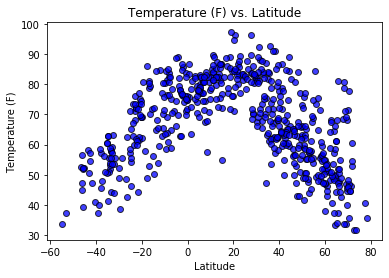

In [7]:
plt.scatter(lat, temp, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
plt.show()
#This scatterplot shows a strong relationship between temperature and latitude.  


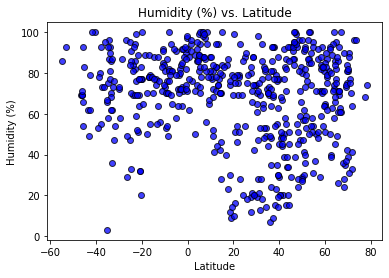

In [8]:
plt.scatter(lat, humidity, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()
#This scatterplot shows a weak relationship between humidity and latitude.


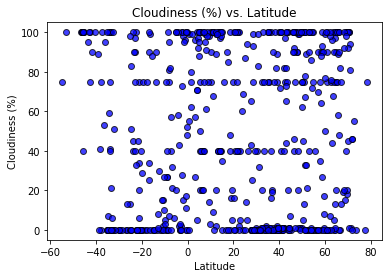

In [9]:
plt.scatter(lat, cloudiness, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()
#This scatterplot shows a weak relationship between cloudiness and latitude.


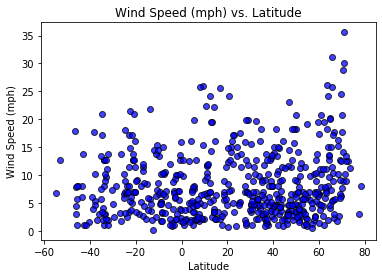

In [10]:
plt.scatter(lat, wind_speed, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()
#The scatterplot shows a weak relationship between the wind speed and latitude.

In [13]:
weather_df = pd.DataFrame(
    {"City":pd.Series(cities),
    "Temp":pd.Series(temp),
    "Latitude":pd.Series(lat),
     "Longitude":pd.Series(lon),
    "Humidity":pd.Series(humidity),
    "Cloudiness":pd.Series(cloudiness),
    "Wind Speed":pd.Series(wind_speed)})
weather_df.head()

,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,weyburn,65.82,49.67,-103.85,83.0,100.0,6.64
1,albany,60.44,42.60,-73.97,58.0,75.0,6.08
2,port hardy,59.00,50.70,-127.42,62.0,75.0,6.93
3,inderborskiy,59.04,-33.02,27.91,36.0,0.0,9.60
4,east london,39.85,69.70,170.31,84.0,18.0,6.31


In [33]:
weather_df['Humidity'].max()

100.0

In [34]:
weather_df.describe()

,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000
mean,66.933939,21.273957,16.147344,68.677362,47.807487,8.130838
std,14.191818,32.967999,91.052470,22.380341,41.326773,5.880133
min,31.750000,-54.800000,-179.170000,3.000000,0.000000,0.220000
25%,56.050000,-4.240000,-65.410000,54.000000,1.000000,3.490000
50%,68.000000,27.670000,21.620000,74.000000,40.000000,6.690000
75%,79.270000,49.190000,98.520000,86.000000,93.000000,11.430000
max,97.160000,78.220000,179.320000,100.000000,100.000000,35.570000


In [14]:
weather_df.to_csv('weatherpy_data.csv', encoding='utf-8', index=False)

In [15]:
weather_north = weather_df.loc[weather_df["Latitude"] >=0]
weather_north

,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
0,weyburn,65.82,49.67,-103.85,83.0,100.0,6.64
1,albany,60.44,42.60,-73.97,58.0,75.0,6.08
2,port hardy,59.00,50.70,-127.42,62.0,75.0,6.93
4,east london,39.85,69.70,170.31,84.0,18.0,6.31
5,pevek,62.22,39.05,-27.98,76.0,2.0,13.15
...,...,...,...,...,...,...,...
555,andrews,86.79,0.54,123.06,62.0,0.0,1.61
556,khani,53.28,60.34,102.28,90.0,100.0,3.83
557,santa rosa,58.03,53.13,132.90,50.0,100.0,5.75
559,benito juarez,63.66,35.30,37.18,70.0,0.0,6.40


In [16]:
x_axis = weather_north['Latitude'].values
y_axis = weather_north['Temp'].values

y= -0.516208643859448x + 87.93154363966812.
The r-squared value is -0.7197780143359848.


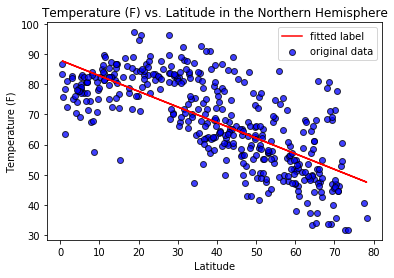

In [35]:
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Temperature (F) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Temperature (F)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis, y_axis)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis, intercept + slope*x_axis, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot show a strong relationship between Temperature and Latitude.

In [37]:
x_axis1 = weather_north['Latitude'].values
y_axis1 = weather_north['Humidity'].values

y= -0.09074780385710757x + 69.82353980120553.
The r-squared value is -0.07691713723064644.


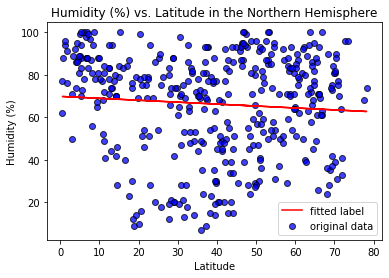

In [38]:
plt.scatter(x_axis1, y_axis1, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Humidity (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis1, y_axis1)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis1, intercept + slope*x_axis1, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between the Latitude and Humidity.

In [39]:
x_axis2 = weather_north['Latitude'].values
y_axis2 = weather_north['Cloudiness'].values

y= -0.0945161249354001x + 53.75482332789409.
The r-squared value is -0.04660838069364237.


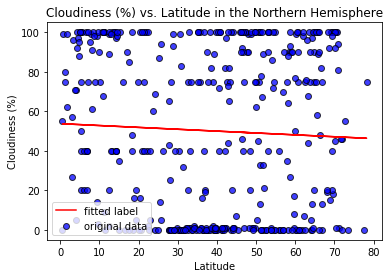

In [40]:
plt.scatter(x_axis2, y_axis2, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Cloudiness (%) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis2, y_axis2)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis2, intercept + slope*x_axis2, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between the Latitude and Cloudiness.

In [41]:
x_axis3 = weather_north['Latitude'].values
y_axis3 = weather_north['Wind Speed'].values

y= 0.04524446802669096x + 6.602425709526175.
The r-squared value is 0.14812880328910133.


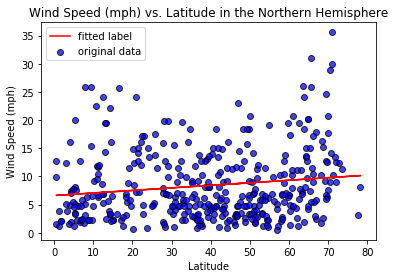

In [42]:
plt.scatter(x_axis3, y_axis3, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Wind Speed (mph) vs. Latitude in the Northern Hemisphere")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
slope, intercept, r_value, p_value, std_err = linregress(x_axis3, y_axis3)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis3, intercept + slope*x_axis3, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Wind Speed and Latitude.

In [43]:
weather_south = weather_df.loc[weather_df["Latitude"] < 0]
weather_south

,City,Temp,Latitude,Longitude,Humidity,Cloudiness,Wind Speed
3,inderborskiy,59.04,-33.02,27.91,36.0,0.0,9.60
6,lagoa,51.80,-33.87,121.90,81.0,41.0,12.75
13,hay river,33.80,-54.80,-68.30,86.0,75.0,6.87
16,krasnoarmeysk,52.50,-46.60,168.33,69.0,100.0,17.90
17,bluff,57.20,-25.24,130.99,47.0,13.0,10.29
...,...,...,...,...,...,...,...
544,ossora,47.12,-41.87,-73.82,100.0,90.0,1.12
545,basco,71.55,-10.27,40.18,74.0,10.0,14.50
547,valkeala,55.40,-33.46,-70.65,62.0,0.0,10.29
550,eyl,82.26,-0.91,122.88,72.0,17.0,7.11


In [44]:
y_axis4 = weather_south['Latitude'].values
x_axis4 = weather_south['Temp'].values


y= 0.8130069820701273x + -73.20866750353343.
The r-squared value is 0.7574655586468413.


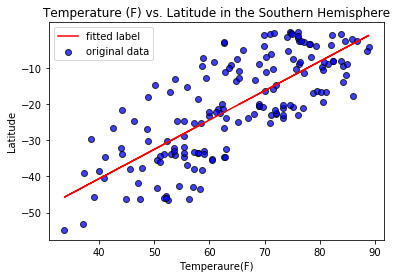

In [45]:
plt.scatter(x_axis4, y_axis4, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Temperature (F) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Temperaure(F)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis4, y_axis4)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis4, intercept + slope*x_axis4, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a strong relationship between Temperature and Latitude.

In [46]:
x_axis5 = weather_south['Humidity'].values
y_axis5 = weather_south['Latitude'].values

y= 0.11570378552009525x + -29.197171187370458.
The r-squared value is 0.13804719093924855.


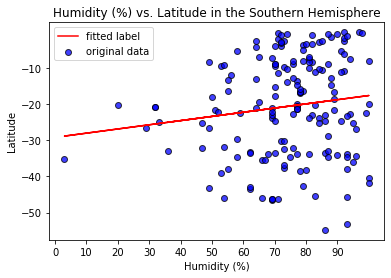

In [47]:
plt.scatter(x_axis5, y_axis5, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Humidity (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Humidity (%)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis5, y_axis5)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis5, intercept + slope*x_axis5, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Humidity and Latitude.

In [48]:
x_axis6 = weather_south['Cloudiness'].values
y_axis6 = weather_south['Latitude'].values

y= -0.06495855592834958x + -17.8412752010619.
The r-squared value is -0.19215295771705368.


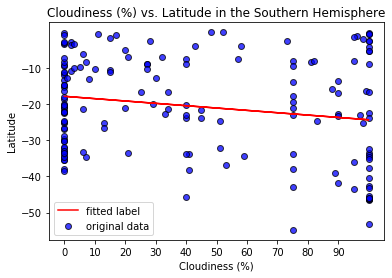

In [49]:
plt.scatter(x_axis6, y_axis6, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Cloudiness (%) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Cloudiness (%)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 100, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis6, y_axis6)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis6, intercept + slope*x_axis6, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Cloudiness and Latitude.

In [50]:
x_axis7 = weather_south["Wind Speed"].values
y_axis7 = weather_south['Latitude'].values

y= -0.16387346818394843x + -19.35270696216512.
The r-squared value is -0.05842865117859823.


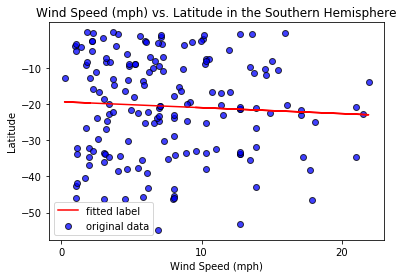

In [51]:
plt.scatter(x_axis7, y_axis7, marker='o', facecolors='blue', edgecolors='black', alpha=0.75, label='original data')
plt.title("Wind Speed (mph) vs. Latitude in the Southern Hemisphere")
plt.xlabel('Wind Speed (mph)')
plt.ylabel("Latitude")
plt.xticks(np.arange(0, 30, step=10))
plt.yticks(np.arange(-60, 0, step=10))
slope, intercept, r_value, p_value, std_err = linregress(x_axis7, y_axis7)
print(f'y= {slope}x + {intercept}.')
print(f'The r-squared value is {r_value}.')
plt.plot(x_axis7, intercept + slope*x_axis7, "r", label='fitted label')
plt.legend()
plt.show()
#This scatterplot shows a weak relationship between Wind Speed and Latitude.